### MA3402 Estadística
## Tarea 3, Entrega 1: Estadística Bayesiana

**Profesor:** Joaquín Fontbona T.

**Auxiliares:** Javier Maass, Francisco Muñoz y Diego Olguín.

# Objetivo

El objetivo de esta tarea consiste en construir estimadores Bayesianos de una distribución muy conocida para ustedes: *La Pareto*. Se estudiarán las propiedades de los estimadores Bayesianos y los compararemos con los estimadores frecuentistas.

En este sentido, esta tarea se puede interpretar como una continuación de la tarea 1 entrega parcial 4.

# Estadística Bayesiana

Recordemos que en el contexto de la estadística, se asume que una variable aleatoria $X$ (que se pueden obtener muestras de este) sigue una ley desconocida $P_\theta \in \mathcal{M}_\theta$, donde $\mathcal{M}_\theta$ es el modelo paramétrico. En este contexto, el objetivo de esta disciplina es el de buscar el parámetro $\theta$ de esta ley.

Sin embargo, dado que $\theta$ es desconocido, este puede ser considerado como otra variable aleatoria, en donde el objetivo de la estadística Bayesiana sería encontrar la ley (posterior) de esta variable.

Pero asumir que $\theta$ puede ser aleatorio, no nos dice nada. ¿Cómo utilizamos las muestras de $X$? Para remediar este problema, se hace uso del teorema de Bayes:
$$
p(\theta \ |\ \bold{X}) = \frac{p(\bold X | \theta) p(\theta)}{p (\bold X)} \propto p(\bold X | \theta) p(\theta)
$$

Donde $\bold X = (x_1, \ldots x_n),\ x_i \sim X$ son muestras de la v.a. $X$. Aquí se pueden identificar varios elementos:
* $p(\theta)$ es la *distribución a priori* del parámetro $\theta$. Esta es la creencia de cómo distribuye $\theta$, al menos inicialmente.
* $p(\bold X | \theta)$ es la *verosimilitud* del parámetro $\theta$, el cuál se suele escribir por $\mathcal L(\theta; \bold X)$ para hacer énfasis que este es una función de $\theta$, y que los datos están "inyectados". Como los datos se encuentran dentro de la definición de la verosimilitud, se puede interpretar como una forma de determinar cuál parámetro es más verosimil dado los datos.
* $p(\bold X)$ la *evidencia*, que sirve como constante de normalización dado que no depende del parámetro $\theta$.

---

# Cálculo de la Posterior

Con este breve resumen, buscaremos calcular la ley posterior de una distribución $\mathrm{Pareto}(c, \alpha)$, donde $c$ es un parámetro conocido y $\alpha$ es desconocido.

Considere que se tiene un muestreo aleatorio simple $x_1, \ldots, x_n \sim \mathrm{Pareto}(\bar c, \alpha)$ donde $\bar c$ es un parámetro conocido y $\alpha$ es el parámetro que buscamos estimar. Recuerde que la función densidad de una Pareto está dada por:
$$
\mathrm{Pareto}(x ; c, \alpha) = \alpha c^{\alpha} \frac{1}{x^{\alpha+1}} \bold{1}_{x\geq c}
$$

Se asumirá que el prior del parámetro $\alpha$ distribuye como una $\mathrm{Gamma}(k_0, \lambda_0)$, donde $k_0$ y $\lambda_0$ son los *hiperparámetros del prior*. Recuerde además que la función distribución de una Gamma está dado por
$$
\mathrm{Gamma}(x; k, \lambda) = \frac{\lambda^k}{\Gamma(k)} x^{k-1} \exp(-\lambda x)
$$
Demuestre que la ley posterior de $\alpha$ viene dado por
$$
p(\alpha \ | \ \bold X) \sim \mathrm{Gamma}\left(k_0 + n, \lambda_0 + \sum_{i=1}^n \ln\left( \frac{x_i}{c} \right)\right)
$$
Y concluya que un prior conjugado de la Pareto para $c$ conocido y $\alpha$ desconocido es la distribución Gamma.

**Demostración**: Aquí la demostración!

$\square$

# Importación de librerías y funciones útiles

Importaremos algunas librerías útiles que utilizaremos en el notebook.

In [ ]:
# Librerías

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats  # Librería útil para Python
import seaborn as sns  # Gráficos bonitos
from pathlib import Path  # Para hacer rutas agnósticas al sistema operativo

# Semilla para hacer resultados replicables
np.random.seed(seed=42)

# Para tener gráficos bonitos
sns.set_theme(
    context="notebook", 
    style="darkgrid", 
)

Al igual que en la Tarea 1 Entrega 4, utilizaremos `Firmas_Grandes.csv`. Cómo se mencionó en esa tarea, este es un dataset que contiene los datos de las 500 empresas más grandes del mundo, según su valor de mercado. 

Las siguientes líneas sirven para importar el dataset que utilizaremos.

In [ ]:
# Descomentar si se quiere ajustar utilizando este dataset
# DATA_NAME, COL_NAME = "CiudadesUS.csv", "pop2023"
DATA_NAME, COL_NAME = "Firmas_Grandes.csv", "Market Value"

# Cambia aquí dependiendo de la carpeta en donde guardas los datos
DATA_FOLDER_PATH = Path(".")
DATA_PATH = DATA_FOLDER_PATH / Path(DATA_NAME)
DATA_PATH

PosixPath('Firmas_Grandes.csv')

In [ ]:
df = pd.read_csv(DATA_PATH, usecols=[COL_NAME])
df.rename(columns={COL_NAME: "values"}, inplace=True)
print(f"{len(df) = }")
df.head()

len(df) = 500


,values
0,1684765.0
1,1359028.0
2,1285516.0
3,1233351.0
4,919284.0


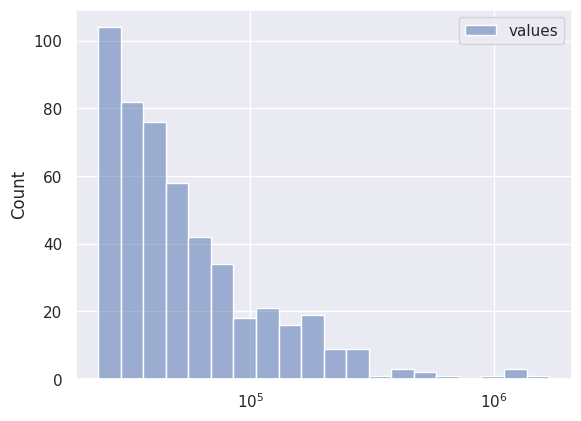

In [ ]:
# Para visualizar los datos
sns.histplot(data=df, log_scale=True)
plt.show()

Dejamos los datos en un cómodo arreglo `X` y definimos $\bar c = \min(\bold X)$ con la variable `C`.

In [ ]:
X = np.array(df["values"])
C = X.min()
np.random.shuffle(X)  # Mezclamos el arreglo pues estos venían ordenados

Por último, definimos una función auxiliar que reciba el número de datos $n$ que se desean utilizar.

In [ ]:
def init_data(n=None, data=None, c=None):
    """
    Inicializa `n` datos de `data`. `c` es la constante de la Pareto.
    En caso de que alguno de los datos no sean proporcionados, se infiere su valor.
    
    En caso de que `n` no se provea, se asume que se toman todos los datos.
    En caso de que `data` no se provea, se asume que es el dataset global `X`.
    En caso de que `c` no se provea, se asume que es la constante global `C`.
    """
    data = data if data is not None else X.copy()
    c = c if c is not None else C
    n = n if n is not None else len(data)
    data = data[:n]

    return n, data, c

n, data, c = init_data(200)
assert n == 200
assert len(data) == 200
assert c == C

---

# Visualizando la Posterior

## Actualizando la posterior

En esta sección observaremos el efecto de actualizar la posterior con nuevos datos. 

Para modelar la posterior del parámetro $\theta$, **utilizaremos las variables aleatorias de scipy**. La mayor ventaja de utilizar este módulo, es que permite modelar las variables aleatorias de una forma muy sencilla, en la que se puede consultar varias propiedades de esta (sólo por poner algunos ejemplos, se puede consultar la función de densidad de probabilidad, la mediana, ¡e incluso se puede integrar con respecto a la v.a!)

Para ello, empiece programando una función que, dado el número de datos `n` y los hiperparámetros necesarios, retorne una instancia "congelada" de [`scipy.stats.gamma`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma). 

**Indicación**: Investigue la forma de parametrizar una Gamma en scipy. Abajo hay un ejemplo para "congelar" una variable aleatoria.

In [ ]:
# Ejemplo para una v.a. congelada
norm_rv = stats.norm(loc=5, scale=2)  # ~ N(5, 2^2)
print(norm_rv.rvs(5))
print(f"{norm_rv.std() = }, {norm_rv.mean() = }")

[5.29636346 7.34487156 6.06280002 6.49821135 8.61791366]
norm_rv.std() = 2.0, norm_rv.mean() = 5.0


In [ ]:
# Constantes de un prior uniforme
K, LAMB = 1, 0

def alpha_post(n=None, data=None, c=None, k=K, lamb=LAMB, return_params=False):
    """
    Retorna la variable aleatoria de la ley posterior del parámetro alpha.
    """
    n, data, c = init_data(n, data, c)

    # Completar aquí!
    params = k_post, lamb_post = (..., ...)
    rv = ...

    if return_params:
        return rv, params

    return rv

# gamma_rv, (k_post, lamb_post) = alpha_post(n=100, return_params=True)
# # Debería de imprimir números
# print(f"{k_post = }, {lamb_post = }")
# # Debería de retornar un float y un arreglo
# gamma_rv.pdf(0.5), gamma_rv.rvs(10)

Ahora estudiaremos cómo evoluciona la posterior con respecto al número de datos. Para esto, utilice la función `plot_posterior_evolution` para graficar la función de densidad de probabilidad de la posterior. Grafique para $n \in \{1, 10, 50, 100, 500\}$ y con un prior no-informativo (esto es, tomando $k=1$ y $\lambda = 0$), entre $x_{min}=0$ y $x_{max}=2.5$. Además, obtenga el promedio y desviación estándar de la posterior y regístrelo en una tabla.

Puede ser de utilidad el método [`pd.DataFrame.to_markdown`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_markdown.html) para incluir tablas en celdas de texto.

In [ ]:
def plot_posterior_evolution(n_list, x_min=0, x_max=2.5, k=K, lamb=LAMB, **kwargs):
    fig, ax = plt.subplots(1, 1)

    mean_list, std_list = [], []

    for n in n_list:
        alpha_post_rv = alpha_post(n, k=k, lamb=lamb,)

        mean_list.append(alpha_post_rv.mean())
        std_list.append(alpha_post_rv.std())

        x_ = np.linspace(x_min, x_max, 200)
        ax.plot(x_, alpha_post_rv.pdf(x_), label=f"{n = }")

    ax.legend()

    df_stats = pd.DataFrame({
        "n": n_list,
        "mean": mean_list,
        "std": std_list,
    })

    df_stats.set_index("n", inplace=True)

    return df_stats

In [ ]:
# Aquí código!

Aquí la tabla!

**¿Qué sucede con valores pequeños de $n$?**
*Respuesta:* Soy una respuesta!

---
**¿Y cón valores altos de $n$?**
*Respuesta:* Soy una respuesta!

---
**¿Observa alguna tendencia de lo que ocurre si $n$ tiende a infinito?**
*Respuesta:* Soy una respuesta!


Ahora simularemos lo que sucede cuando introducimos "conocimiento experto" al prior. Para esto, seguiremos estos pasos:

1. Calculamos la **mediana** $x_m$ (no el promedio) de los primeros 50 datos de $\bold X$ (esto lo hacemos porque en estos datos hay muchos *outliers*). Esto simula que sólo tenemos conocimiento de los primeros 50 datos, y no conocemos el resto de datos.
2. Definimos $\bar \alpha = \log(c) / \log(x_m / \bar c)$ (se obtiene imponiendo $x_m = c \sqrt[\alpha]{2}$, donde la parte derecha es la mediana de una Pareto).
3. Obtenemos $k=15$ muestras $\tilde x_1, \ldots, \tilde x_{k}$ de forma que $\tilde x_i \sim \mathrm{Pareto}(\bar c, \bar \alpha)$.
4. Utilizamos $k_0 = k + 1$ y $\lambda_0 = \sum_{i=1}^{k} \ln \left(\tilde x_i / \bar c\right)$ como hiperparámetros para el prior.

Estos pasos se encuentran implementados en la función `estimate_hyperparameters`.

In [ ]:
# Cálculo de los hiperparámetros k y lambda

def estimate_hyperparameters(k, n=50, data=None, c=None, seed=None):
    n, data, c = init_data(n, data, c)

    x_m = np.median(data)
    alph = np.log(2) / np.log(x_m / C)
    x_tilde = stats.pareto.rvs(alph, scale=C, size=k, random_state=seed)
    lamb = np.log(x_tilde / C).sum()

    return k+1, lamb

# Aquí asignamos k y lambda
k_, lamb_ = estimate_hyperparameters(15, seed=42)
k_, lamb_

(16, 10.677791957233872)

Grafique las funciones de densidad de probabilidad utilizando estos hiperparámetros, como en la parte anterior.

In [ ]:
# Aquí el grafico de las funciones de distribución!

Aquí la tabla!

**¿Cómo se compara el gráfico con el caso del prior no-informativo? ¿Hubo alguna mejora? Puede cambiar el número de datos y el $k_0$ para concluir mejor**
*Respuesta:* Soy una respuesta!

## Comparándo con los datos

Si bien tenemos que la estimación del parámetro es ahora una distribución de probabilidad, nos falta un pequeño detalle: ¿cómo escogemos un parámetro a partir de este? Una opción es muestrear $\tilde\alpha \sim p(\alpha \ |\ \bold X)$ y utilizar el modelo $\mathrm{Pareto}(\bar c, \tilde\alpha)$ como aquella que explica a $X$. 

Sin embargo, ¿Qué sucede si la posterior tiene mucha varianza? Es aquí en donde obtener la precisión se hace relevante (que, dicho sea de paso, la precisión está definida como la inversa de la varianza $t = \frac{1}{\sigma^2}$). La precisión nos puede decir acerca de *qué tan confiado está nuestro modelo de su estimación*, que en contraste con el enfoque frecuentista, esto no sucede.

Para visualizar esto, vamos a comparar la distribución que generan los datos reales (esto lo haremos a través de un histograma, normalizado para que integre 1) y lo compararemos con las gráficas de las funciones de distribución de probabilidad utilizando parámetros aleatorios muestreados de la posterior. Es decir, se muestrarán $\alpha_1,\ldots, \alpha_\ell \sim p(\alpha \ |\ \bold X)$ y se graficarán las funciones de distribución de las leyes $\mathrm{Pareto}(\bar c, \alpha_i),\ \forall i = 1,\ldots, \ell$.

Para realizar los gráficos, se definirá una función `plot_data_models` que grafica el histograma de los datos y que grafica las curvas de las $\mathrm{Pareto}(\bar c, \alpha_i)$ con $\alpha_1, \ldots, \alpha_\ell \sim \mathrm{Gamma}(k_0 + n,\ \lambda_0 + \sum_{i=1}^n \ln (x_i / \bar c))$. Se incluye además, destacado en rojo, la curva de la Pareto en donde se utiliza el promedio de la posterior, y la precisión de la posterior(esto es $t_n = \frac{1}{\sigma_n^2}$ con $\sigma_n^2=\mathbb{V}_{\alpha \sim p(\alpha | \bold X^{(n)})}[\alpha]$) en el título del gráfico.

Note que los parámetros $n$, $k_0$, $\lambda_0$ son modificables.

In [ ]:
def plot_data_models(n=None, k=K, lamb=LAMB, ell=1_000, data=None, c=None, **kwargs):
    n, data, c = init_data(n, data, c)
    alpha_post_rv, (k, lamb) = alpha_post(n, data, c, k, lamb, return_params=True)
    alphas_samples = alpha_post_rv.rvs(ell)

    fig, ax = plt.subplots(1, 1)

    ax = sns.histplot(
        data=df,
        stat="density",
        bins=np.logspace(np.log(c), np.log(np.max(X)), 30, base=math.e),
        ax=ax,
    )

    _, x_max = ax.get_xlim()

    x_ = np.linspace(c, x_max, 100)

    for alpha in alphas_samples:
        pareto_rv = stats.pareto(alpha, scale=c)

        ax.plot(x_, pareto_rv.pdf(x_), "b", alpha=0.01) 

    alpha_mean = alpha_post_rv.mean()
    pareto_rv = stats.pareto(alpha_mean, scale=c)
    ax.plot(x_, pareto_rv.pdf(x_), "r--", label="Curva promedio") 

    ax.set_title(f"$n = {n}$, $t_n = {1/alpha_post_rv.var():.2f}$")
    ax.set_xlabel("Market Values")
    ax.legend()

    plt.yscale("log")
    plt.xscale("log")

Grafique para $n \in \{1, 10, 500\}$ utilizando el prior no-informativo $k=1, \lambda=0$ y el prior estimado anteriormente utilizando "información experta". Puede graficarlos todos juntos (modificando, extendiendo o inspirándose de la función anterior), o en gráficos separados.

In [ ]:
# El código aquí!

**¿Qué sucede cuando aumenta $n$ en ambos casos?**
*Respuesta*: Soy una respuesta!

---
**¿Qué sucede cuando se utilizan los hiperparámetros estimados $k_0$ y $\lambda_0$? ¿Nota algún cambio con respecto al prior no-informativo?**
*Respuesta*: Soy una respuesta!

---

# Estimadores

En esta seeción estudiaremos la naturaleza de los distintos estimadores que se pueden construir a partir de la distribución posterior, y lo compararemos con el estimador de máxima verosimilitud. A continuación se definen los estimadores a utilizar:
$$
\begin{aligned}
\hat \alpha_{MLE}^{(n)} &\in \mathrm{arg} \max_\alpha p(\bold X^{(n)} \ |\ \theta)\\
\hat \alpha_{MAP}^{(n)} &\in \mathrm{arg} \max_\alpha p(\theta \ |\ \bold X^{(n)})\\
\hat \alpha_{mean}^{(n)} & = \mathbb{E}_{\theta \sim p(\theta \ |\ \bold X^{(n)})} \left[\theta \right] = \int \theta p(\theta \ |\ \bold X^{(n)}) \mathrm{d}\theta \\
\hat \alpha_{median}^{(n)} & = q_{p(\theta \ |\ \bold X^{(n)})}(0.5) = F_{p(\theta \ |\ \bold X^{(n)})}^{-1}(0.5)
\end{aligned}
$$

Donde se utiliza la notación $\bold X^{(\ell)} = (x_1, \ldots, x_\ell)$ para los primeros $\ell$ datos.

El primer estimador es el *estimador de máxima verosimilitud* (el que ya conocen muy bien), mientras que los otros tres estimadores son inherentes a la distribución posterior. Por ejemplo, para el segundo estimador, se utiliza la moda de la posterior, estimador que también se suele llamar *máximo a posteriori*. El tercer estimador utiliza el promedio de la posterior, y el último estimador utiliza la mediana.

En esta sección se pide programar una función que calcule los cuatro estimadores para la posterior en un diccionario. No es necesario calcular los resultados anteriores de forma analítica. Puede investigar cuales son el promedio, la mediana y la moda de una Gamma, o bien, utilizar los métodos de [`scipy.stats.gamma`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma)

Recuerde que el estimador de máxima verosimilitud de una Pareto (con $c$ conocido) se vió en una tarea anterior (incluso en el auxiliar) y viene dado por
$$
\hat \alpha_{MLE}^{(n)} = \frac{n}{\sum_{i=1}^{n} \ln\frac{x_i}{c}}
$$

In [ ]:
def alpha_estimators(n=None, k=K, lamb=LAMB, data=None, c=None):
    n, data, c = init_data(n, data, c)
    estimators = dict()

    # MLE
    estimators["mle"] = ...

    # Mode
    estimators["map"] = ...

    # Mean
    estimators["mean"] = ...

    # Median
    estimators["median"] = ...

    return estimators

La función `plot_estimators` grafica el histograma de los datos junto con las funciones de densidad de probabilidad para cada uno de los estimadores (es decir, grafica una $\mathrm{Pareto}(\bar c, \hat \alpha)$ con $\hat\alpha \in\{\hat\alpha^{(n)}_{MLE}, \hat\alpha^{(n)}_{MAP}, \hat\alpha^{(n)}_{mean}, \hat\alpha^{(n)}_{median}\}$)

Utilizando esta función, grafique para $n = 2$ con los priors no-informativos y de "información experta".

In [ ]:
def plot_estimators(n=2, k=K, lamb=LAMB, data=None, c=None, **kwargs):
    n, data, c = init_data(n, data, c)
    alpha_ests = alpha_estimators(n, k, lamb, data, c)

    fig, ax = plt.subplots(1, 1)

    ax = sns.histplot(
        data=df,
        stat="density",
        bins=np.logspace(np.log(c), np.log(np.max(X)), 30, base=math.e),
        ax=ax,
    )

    _, x_max = ax.get_xlim()

    x_ = np.linspace(c, x_max, 100)

    for est_name in alpha_ests:
        pareto_rv = stats.pareto(alpha_ests[est_name], scale=c)

        ax.plot(x_, pareto_rv.pdf(x_), label=est_name) 

    ax.set_title(f"$n = {n}$")
    ax.legend()

    plt.yscale("log")
    plt.xscale("log")

In [ ]:
# Aquí el código!

**¿Qué sucede con el ajuste a los datos reales? ¿En qué caso se ajustan mejor?**
*Respuesta*: 

Consideremos ahora los estimadores $\hat \alpha^{(n)}_{MLE}$ y $\hat \alpha^{(n)}_{MAP}$. La función `plot_abs_error` grafica la diferencia absoluta entre los dos estimadores en función de $n$ (esto es, grafica la función $n \mapsto |\hat \alpha^{(n)}_{MLE} - \hat \alpha^{(n)}_{MAP}|$). 

Utilizando esta función, grafique la diferencia absoluta para los dos tipos de priors y para un $k_0$ y $\lambda_0$ cualquiera (pero distintos a los otros dos).

**Hint**: Puede ser útil iniciar de un $n_{inicial}$ (por ejemplo, $n_{inicial}=50$) para apreciar mejor los resultados.

In [ ]:
def plot_abs_error(k=K, lamb=LAMB, init=0, last=500):
    mle_ests = []
    map_ests = []

    for n in range(1, last+1):
        estimators = alpha_estimators(n, k=k, lamb=lamb)
        mle_ests.append(estimators["mle"])
        map_ests.append(estimators["map"])

    mle_ests = np.array(mle_ests)
    map_ests = np.array(map_ests)

    x = np.arange(init, last)
    plt.plot(x, np.abs(mle_ests - map_ests)[init:])

    plt.show()

In [ ]:
# Aquí el código!

**¿Qué puede deducir de los gráficos anteriores? ¿Qué sucede en el caso del prior no-informativo?**
*Respuesta*: Soy una respuesta!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=05da59f1-7b9f-4970-8d32-7a5e3b8b8a3d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>